<a href="https://colab.research.google.com/github/pparutto/BINF2025_TP6/blob/main/BINF2025_tp6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## BINF TP6 : bases de données métaboliques et rdkit

Les bases de données métaboliques stockent des informations sur les composés et réaction chimiques présentes chez différents organismes ainsi que les enzymes associées. rdkit est une bibliothèque de manipulation de composés et réactions chimiques.

Installons rdkit :

In [5]:
!pip install rdkit

error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try 'pacman -S
    python-xyz', where xyz is the package you are trying to
    install.
    
    If you wish to install a non-Arch-packaged Python package,
    create a virtual environment using 'python -m venv path/to/venv'.
    Then use path/to/venv/bin/python and path/to/venv/bin/pip.
    
    If you wish to install a non-Arch packaged Python application,
    it may be easiest to use 'pipx install xyz', which will manage a
    virtual environment for you. Make sure you have python-pipx
    installed via pacman.

note: If you believe this is a mistake, please contact your Python installation or OS distribution provider. You can override this, at the risk of breaking your Python installation or OS, by passing --break-system-packages.
hint: See PEP 668 for the detailed specification.


## Exercice 1 : Base de données Kegg et visualisation du cycle TCA

[https://www.genome.jp/kegg/](https://www.genome.jp/kegg/)

1. Utilisez le module «pathway » de la base de donnes Kegg pour visualiser le cycle de l’acide citrique. Appelé en anglais : TCA cycle, citric acid cycle ou encore Krebs cycle.
2. Combien de reactions contient-il ? On s'intéresse uniquement aux réactions du cycle contenant l'acide citrique.

9

3. Quels sont les identifiants EC (E.C numbers) associes à chacune de ces réactions.

- 2.3.3.1
- 4.2.1.3
- 1.1.1.42
- 1.2.4.2
- 6.2.1.4
- 1.3.2.4
- 4.2.1.2
- 1.1.1.37
- 2.3.1.61

4. Pourquoi certains identifiants EC sont-ils en double ?

Votre réponse ici.

5. Qu’observez-vous de plus à propos de ces EC numbers ?

Votre réponse ici.

Malheureusement la base de données KEGG ne peut pas être téléchargée gratuitement, nous allons donc changer de base de données.

## Exercice 2 : Base de données Rhea et visualisation du cycle TCA

[https://www.rhea-db.org/](https://www.rhea-db.org/)

A L’inverse, la base de données Rhea est téléchargeable, mais elle ne fournit pas de visualisation des voies métaboliques. C’est pour ça que l’on a fait la partie précédente avec KEGG.


1. Trouvez les IDs Rhea associés aux EC numbers extraits dans l'exercice précédent. Faites attention à choisir des réactions unidirectionnelles. Si vous avez l’id d’une réaction bidirectionnelle, id+1 et id+2 devraient correspondre aux réactions décomposées dans chaque sens. Faites attention au sens de réaction.

- EC:4.2.1.3 RHEA:10337
- EC:1.1.1.42 RHEA:19630
- EC:1.2.4.2 RHEA:12189
- EC:2.3.1.61 RHEA:15215
- EC:6.2.1.4 RHEA:22122
- EC:1.3.2.4 RHEA:77904
- EC:4.2.1.2 RHEA:12462
- EC:1.1.1.37 RHEA:21433
- EC:2.3.3.1 RHEA:16846

2. Téléchargez Rhea, choisissez le format « rhea-reaction-smiles.tsv ». Quel est ce format ?

Des équations

3. Chargez ce fichier via RdKit via "rdChemReactions.ReactionFromSmarts" du module rdkit.Chem

In [9]:
from rdkit.Chem import rdChemReactions

rxn = rdChemReactions.ReactionFromSmarts("CCO.C=O>>CC(=O)O")

with open("/home/haitak/Téléchargements/rhea-reaction-smiles.tsv", "r") as file:
    for line in file:
        rhea_id, reaction_smiles = line.strip().split("\t")

        try:
            rxn = rdChemReactions.ReactionFromSmarts(reaction_smiles)
            if rxn is not None:
                print(f"✅ Réaction {rhea_id} chargée.")
            else:
                print(f"❌ Échec pour {rhea_id}")
        except Exception as e:
            print(f"⚠️ Erreur pour {rhea_id} : {e}")


✅ Réaction 10001 chargée.
✅ Réaction 10002 chargée.
✅ Réaction 10005 chargée.
✅ Réaction 10006 chargée.
✅ Réaction 10009 chargée.
✅ Réaction 10010 chargée.
✅ Réaction 10013 chargée.
✅ Réaction 10014 chargée.
✅ Réaction 10017 chargée.
✅ Réaction 10018 chargée.
✅ Réaction 10021 chargée.
✅ Réaction 10022 chargée.
✅ Réaction 10025 chargée.
✅ Réaction 10026 chargée.
✅ Réaction 10029 chargée.
✅ Réaction 10030 chargée.
✅ Réaction 10033 chargée.
✅ Réaction 10034 chargée.
✅ Réaction 10037 chargée.
✅ Réaction 10038 chargée.
✅ Réaction 10041 chargée.
✅ Réaction 10042 chargée.
✅ Réaction 10045 chargée.
✅ Réaction 10046 chargée.
✅ Réaction 10049 chargée.
✅ Réaction 10050 chargée.
✅ Réaction 10053 chargée.
✅ Réaction 10054 chargée.
✅ Réaction 10057 chargée.
✅ Réaction 10058 chargée.
✅ Réaction 10061 chargée.
✅ Réaction 10062 chargée.
✅ Réaction 10065 chargée.
✅ Réaction 10066 chargée.
✅ Réaction 10073 chargée.
✅ Réaction 10074 chargée.
✅ Réaction 10077 chargée.
✅ Réaction 10078 chargée.
✅ Réaction 1

4. Cherchez dans ces réactions celles associées au cycle TCA en vous basant sur l’ID Rhea.

✅ TCA Réaction trouvée : RHEA:10337


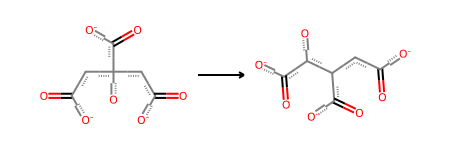

✅ TCA Réaction trouvée : RHEA:12189


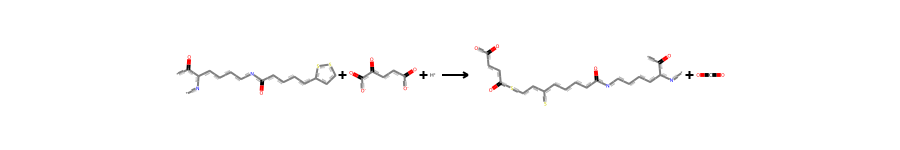

✅ TCA Réaction trouvée : RHEA:12462


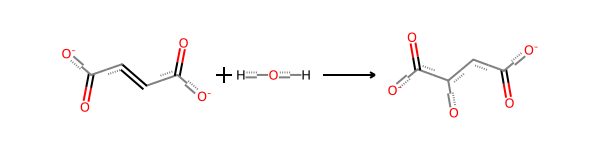

✅ TCA Réaction trouvée : RHEA:15215


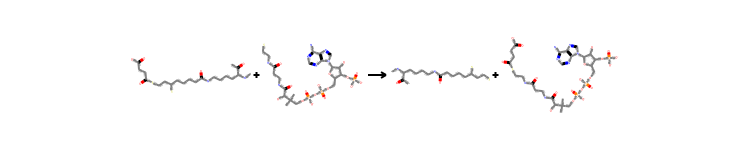

✅ TCA Réaction trouvée : RHEA:16846


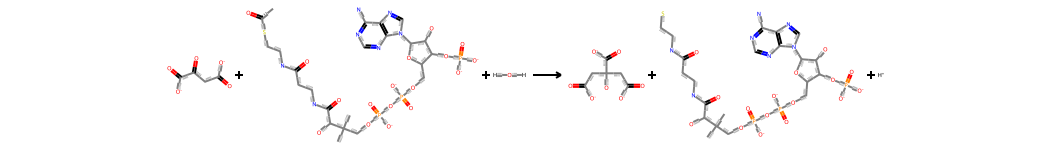

✅ TCA Réaction trouvée : RHEA:19630


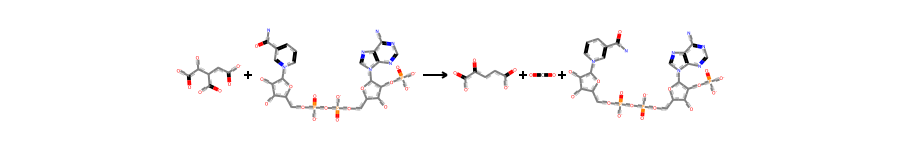

✅ TCA Réaction trouvée : RHEA:21433


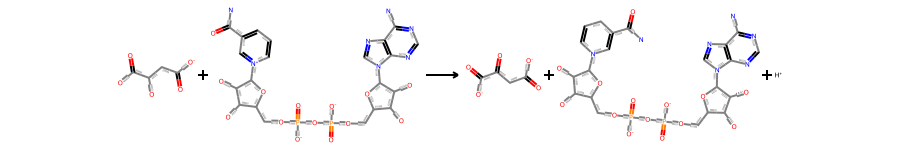

✅ TCA Réaction trouvée : RHEA:22122


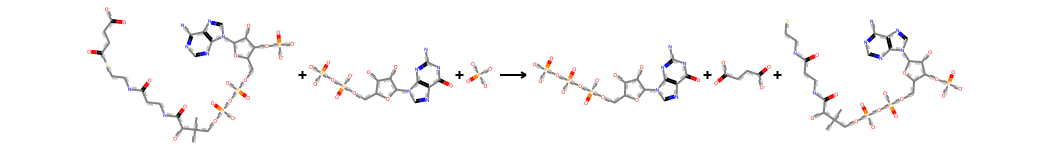

✅ TCA Réaction trouvée : RHEA:77904


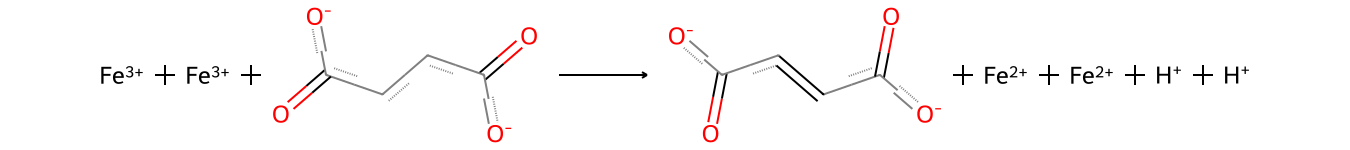

In [17]:
from rdkit.Chem import rdChemReactions
from IPython.display import display

tca_rhea_ids = {
    "10337", "19630", "12189", "15215", "22122", "77904", "12462", "21433", "16846"
}


with open("/home/haitak/Téléchargements/rhea-reaction-smiles.tsv", "r") as file:
    for line in file:
        rhea_id, reaction_smiles = line.strip().split("\t")
     
        if rhea_id in tca_rhea_ids:
            rxn = rdChemReactions.ReactionFromSmarts(reaction_smiles)
            print(f"✅ TCA Réaction trouvée : RHEA:{rhea_id}")
            display(rxn)
            

5. Affichez les réactions du cycle TCA, vous pouvez utiliser la fonction display de « IPython.display » sur une réaction, vous devez aussi importer

« from rdkit.Chem.Draw import IPythonConsole »

In [ ]:
cf 4.


## Exercice 3 : RdKit

1.	Pour se familiariser avec Rdkit et le format MOL nous allons faire un parser de MOL.
Ecrire la fonction load_mol(fname: str) -> Chem.Mol qui prend un fichier mol en entrée et retourne la molécule associée au format Mol de RdKit.
Utilisez Chem.Mol, Chem.EditableMol, m.AddAtom, m.AddBond

In [ ]:
print("votre code ici !!")


2.	Ecrire la fonction raw_formula(m: Chem.Mol) -> str qui retourne la formule brute de la molécule m.
Utilisez GetAtoms sur une molécule pour récupérer les listes des atomes et GetSymbol sur un atome pour récupérer son symbole.

In [ ]:
print("votre code ici !!")

3.	Récupérez les smiles et inchi de la molécule "citrulline" à partir des bases de données Rhea et pubchem. Puis :

* Comparez les Smiles ;
* Chargez les molécules dans rdkit via « Chem.MolFromSmiles» et comparez-les ;
* Comparez les formules brutes généré par votre fonction précédente ;
* Comparez les smiles générés par « Chem.MolToSmiles » ;
* Testez la méthode « m.HasSubstructMatch(m2) ».

In [ ]:
print("votre code ici !!")

4.	A quelle molécule correspond ce smiles :

C[NH2+] [C@H] 1[C@H] (O) [C@@H] (O) [C@H] (CO) O[C@H] 1O[C@H] 1[C@@H] (O[C@@H] (C) [C@] 1(O) CO) O[C@H] 1[C@H] (O) [C@@H] (OP([O- ] ) ([O- ] ) =O) [C@H] (NC(N) =[NH2+] ) [C@@H] (O) [C@@H] 1NC(N) =[NH2+]

votre réponse ici!